In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Sangeeta\Downloads\E-commerce Customer Behavior - Sheet1.csv")

In [3]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [24]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [33]:
df[df['Satisfaction Level'].isnull()==True]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [34]:
df['Satisfaction Level']=df['Satisfaction Level'].replace({np.nan:'Satisfied'})

In [30]:
df['Satisfaction Level'].mode()

0    Satisfied
Name: Satisfaction Level, dtype: object

In [38]:
df['Satisfaction Level'].isnull().sum()

np.int64(0)

In [4]:
df.City.unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [5]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [7]:
cat_cols=['Gender', 'City', 'Membership Type','Discount Applied']

In [8]:
num_cols=['Age', 'Total Spend', 'Items Purchased', 'Average Rating','Days Since Last Purchase']

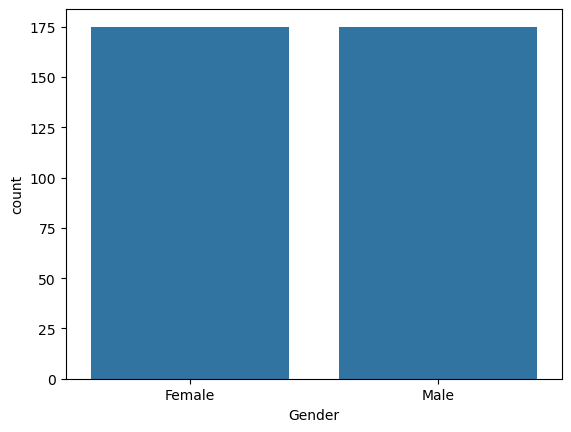

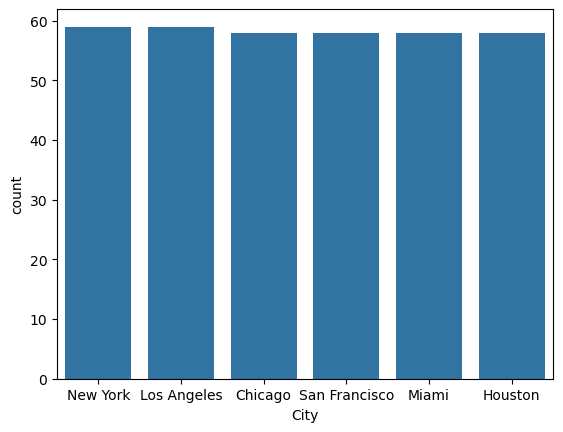

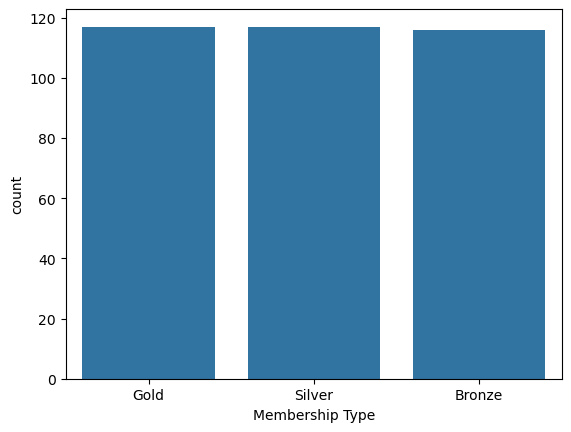

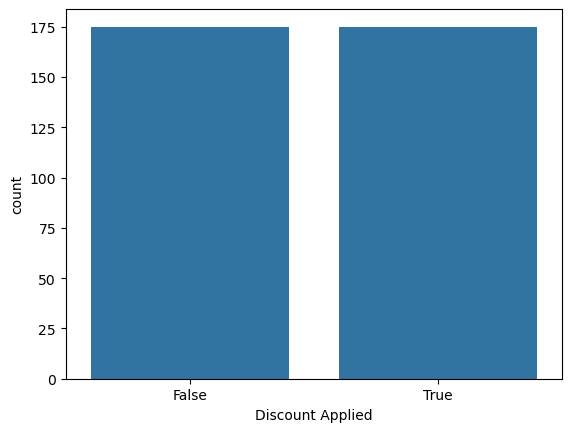

In [11]:
#DATA VISUALISATIN FOR CATEGORICAL DATA
for i in cat_cols:
    sns.countplot(data=df,x=df[i])
    plt.show()

In [17]:
for i in cat_cols:
    grouped_data = df.groupby(i)['Satisfaction Level'].value_counts()
    print(grouped_data)
    print('---'*30)


Gender  Satisfaction Level
Female  Unsatisfied           59
        Satisfied             58
        Neutral               56
Male    Satisfied             67
        Unsatisfied           57
        Neutral               51
Name: count, dtype: int64
------------------------------------------------------------------------------------------
City           Satisfaction Level
Chicago        Unsatisfied           58
Houston        Neutral               56
Los Angeles    Neutral               51
               Satisfied              8
Miami          Unsatisfied           58
New York       Satisfied             59
San Francisco  Satisfied             58
Name: count, dtype: int64
------------------------------------------------------------------------------------------
Membership Type  Satisfaction Level
Bronze           Unsatisfied            58
                 Neutral                56
Gold             Satisfied             117
Silver           Unsatisfied            58
                 Ne

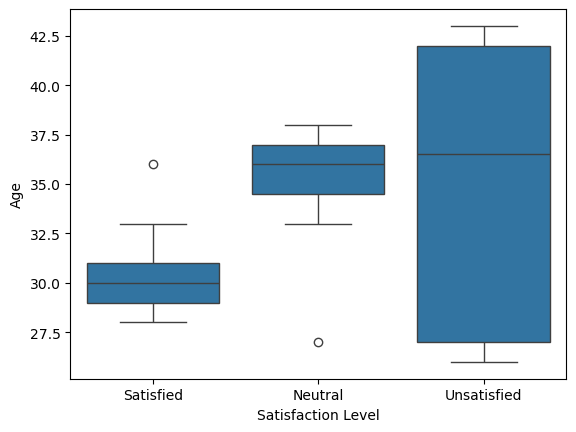

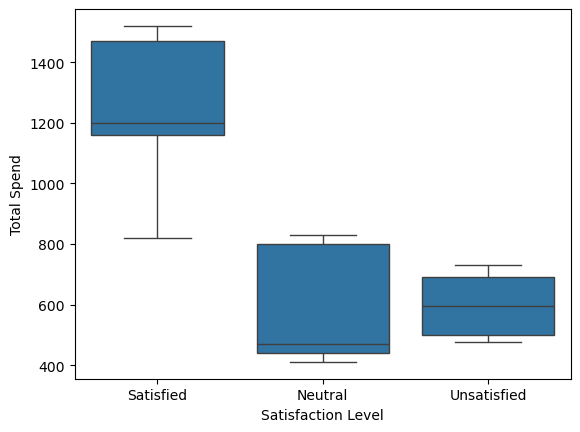

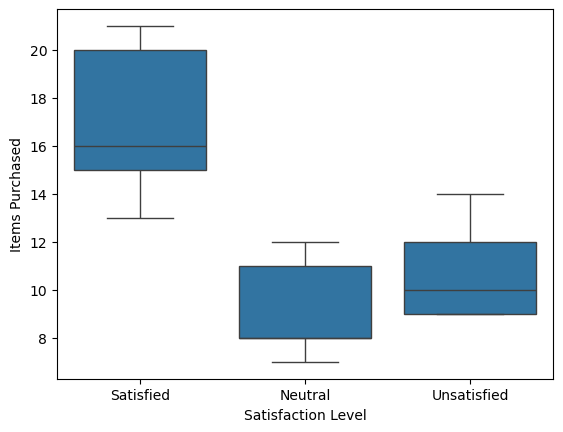

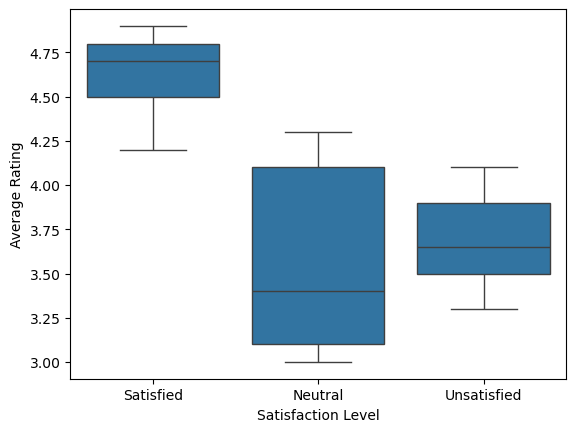

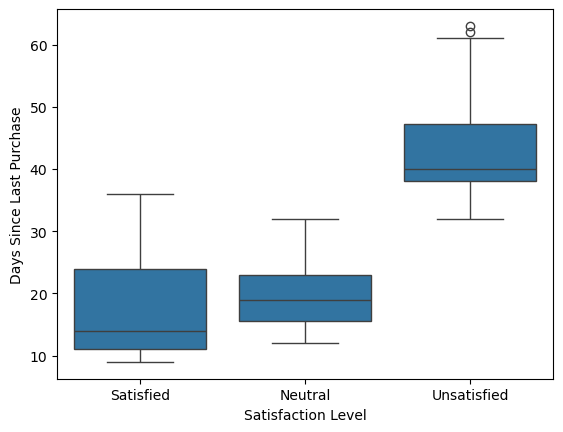

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in num_cols:
    sns.boxplot(x='Satisfaction Level', y=i, data=df)
    plt.show()


<Axes: >

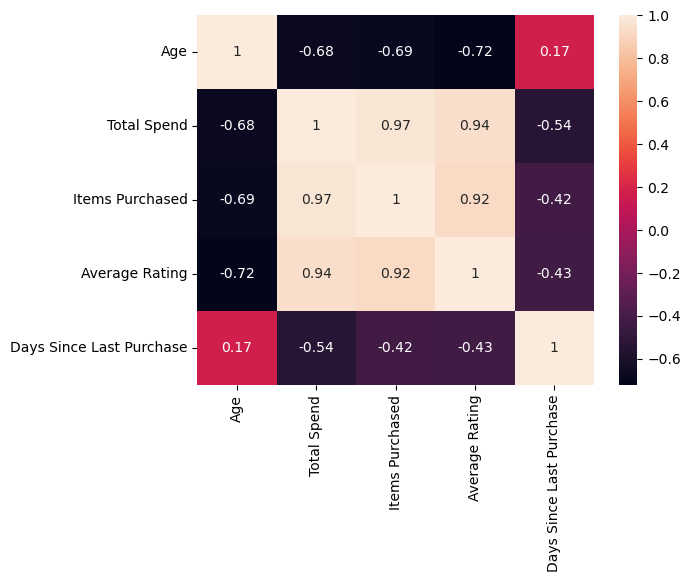

In [21]:
sns.heatmap(data=df[num_cols].corr(),annot=True)

In [22]:
#Multicollinearity exists so, it is easier to apply a decision tree for this model

Accuracy: 0.9714285714285714


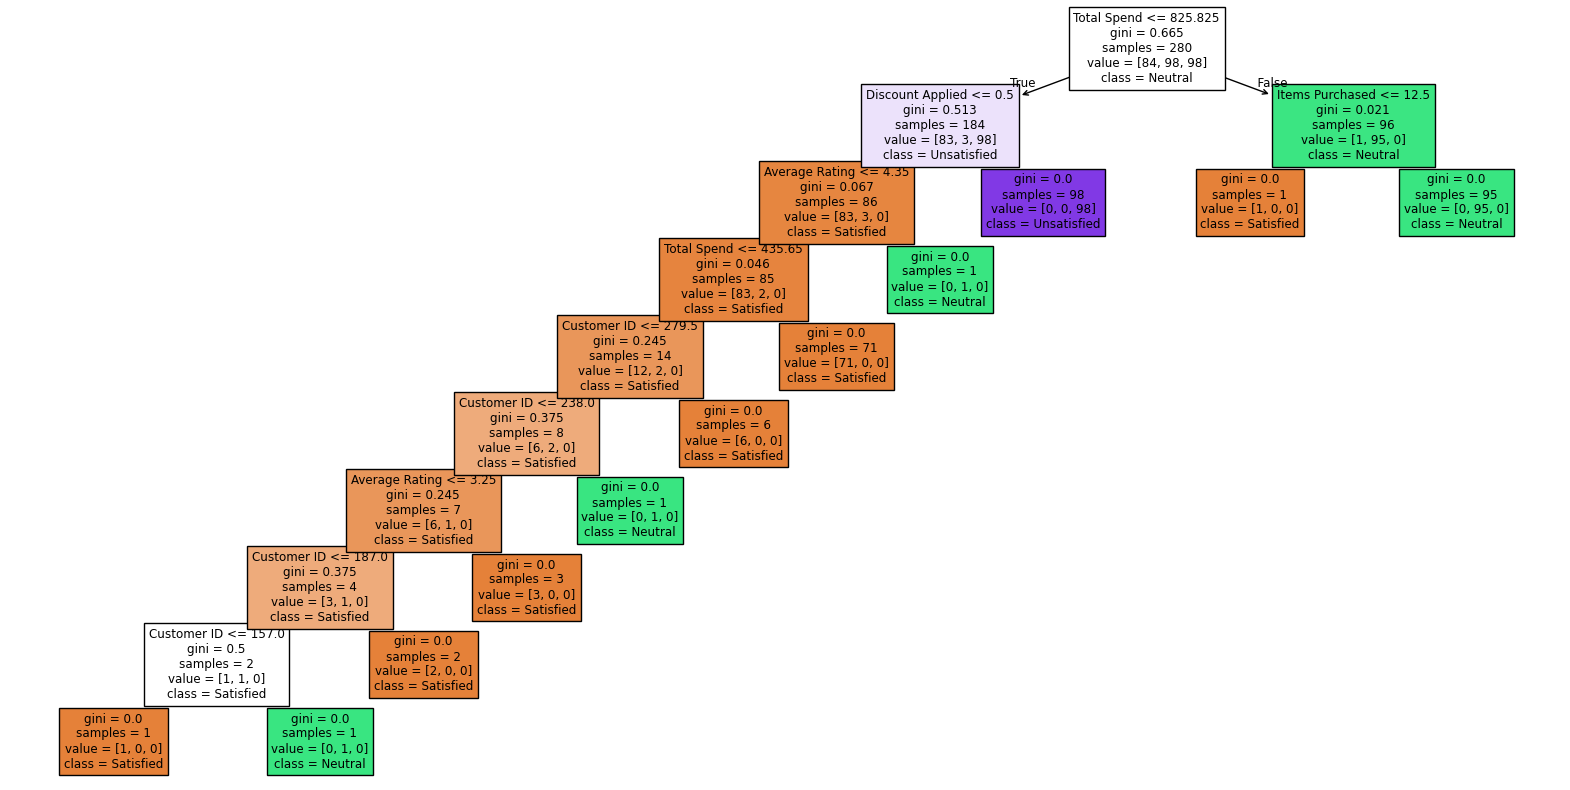

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
X = df.drop(columns=['Satisfaction Level'])  # Features
y = df['Satisfaction Level']  # Target variable

# Encode categorical features if necessary
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()
